In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import kstest, norm

In [85]:
matriculados = pd.read_csv("/home/willgm/STUFF/UNAL/7sem/Analisis BBDD/Proyecto-ABD-2024-2/Matriculados_mod1.csv")
aspirantes = pd.read_csv("/home/willgm/STUFF/UNAL/7sem/Analisis BBDD/Proyecto-ABD-2024-2/Aspirantes.csv")

In [4]:
att_comunes = np.intersect1d(matriculados.columns, aspirantes.columns)
att_comunes

array(['AREAC_SNIES', 'AREA_CINE', 'CA_CINE', 'CD_CINE', 'CIU_NAC',
       'CODS_NAC', 'DEP_NAC', 'EDAD', 'ESTRATO', 'LAT_CIU_NAC',
       'LON_CIU_NAC', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA',
       'PROGRAMA', 'SEMESTRE', 'SEXO', 'SNIES_PROGRA', 'TIPO_NIVEL',
       'YEAR'], dtype=object)

In [5]:
att_Numcomunes = np.intersect1d(matriculados.select_dtypes(include=['number']).columns, aspirantes.select_dtypes(include=['number']).columns)
att_Numcomunes

array(['CA_CINE', 'CD_CINE', 'EDAD', 'LAT_CIU_NAC', 'LON_CIU_NAC',
       'SEMESTRE', 'SNIES_PROGRA', 'YEAR'], dtype=object)

In [6]:
att_NoNumcomunes = np.intersect1d(matriculados.select_dtypes(exclude=['number']).columns, aspirantes.select_dtypes(exclude=['number']).columns)
att_NoNumcomunes

array(['AREAC_SNIES', 'AREA_CINE', 'CIU_NAC', 'CODS_NAC', 'DEP_NAC',
       'ESTRATO', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA', 'PROGRAMA',
       'SEXO', 'TIPO_NIVEL'], dtype=object)

+ mejorar analisis de atributos en comun
+ verificar que significa year en cada uno y como se puede usar

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

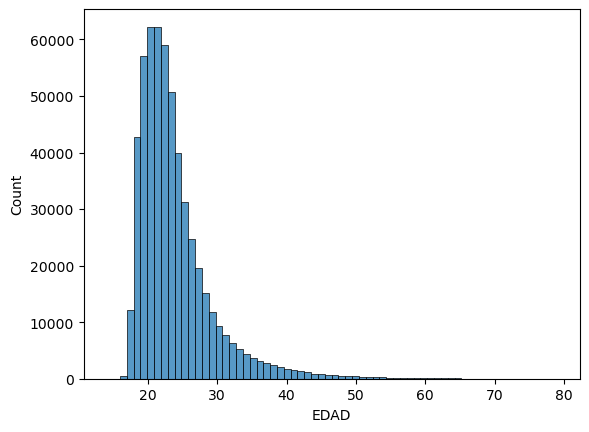

In [7]:
sns.histplot(data=matriculados,x="EDAD",bins=np.ptp(matriculados['EDAD'])+1)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

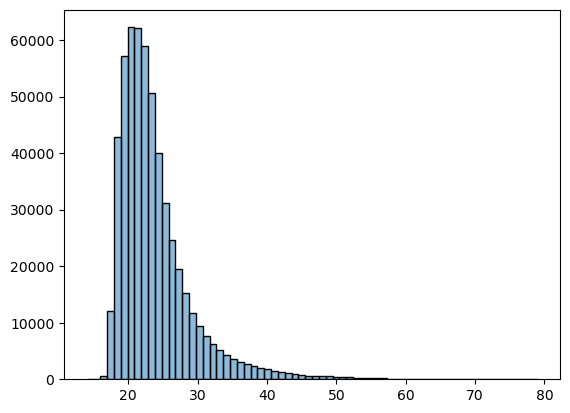

In [8]:
sns.histplot(data=matriculados["EDAD"],bins=np.ptp(matriculados['EDAD'])+1,kde=True)

In [31]:
edadAsp = aspirantes[aspirantes["EDAD"]>0]

<AxesSubplot:xlabel='EDAD', ylabel='Count'>

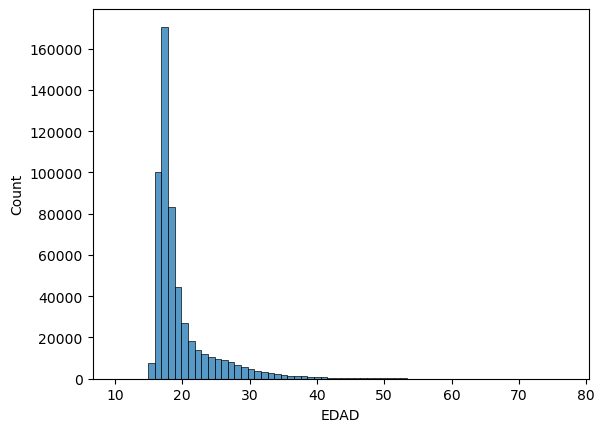

In [32]:
sns.histplot(data=edadAsp,x="EDAD",bins=np.ptp(edadAsp['EDAD'])+1)

<AxesSubplot:xlabel='EDAD'>

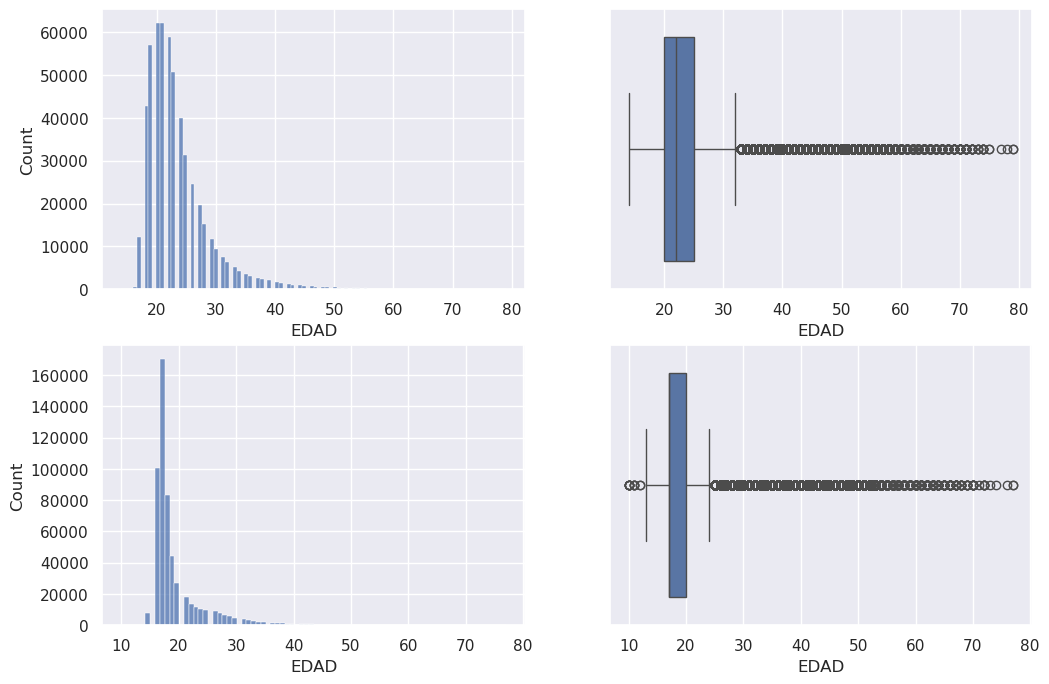

In [42]:
fig, axes = plt.subplots(2,2,figsize=(12, 8))


sns.histplot(data=matriculados,x="EDAD",bins=100,ax=axes[0,0])
sns.histplot(data=aspirantes[aspirantes["EDAD"]>0],x="EDAD",bins=80,ax=axes[1,0])

sns.boxplot(data=matriculados,x="EDAD",ax=axes[0,1])
sns.boxplot(data=aspirantes[aspirantes["EDAD"]>0],x="EDAD",ax=axes[1,1])

In [35]:
for i in matriculados["EDAD"]:
    print(i,end=', ')

46, 27, 29, 24, 24, 24, 21, 21, 23, 24, 24, 22, 30, 30, 25, 22, 37, 25, 28, 33, 28, 27, 30, 22, 24, 23, 26, 25, 25, 27, 22, 22, 24, 23, 26, 29, 22, 30, 24, 23, 24, 28, 23, 22, 24, 22, 23, 31, 26, 25, 25, 24, 29, 32, 27, 29, 23, 23, 23, 26, 23, 24, 26, 25, 23, 25, 22, 23, 24, 22, 26, 25, 25, 26, 22, 20, 24, 25, 22, 31, 21, 24, 25, 27, 26, 23, 25, 23, 25, 30, 26, 27, 29, 22, 20, 36, 25, 25, 24, 24, 22, 29, 26, 22, 30, 26, 25, 27, 26, 24, 25, 23, 27, 29, 23, 24, 25, 24, 24, 27, 24, 24, 23, 23, 25, 28, 29, 22, 24, 24, 23, 25, 24, 25, 26, 24, 25, 25, 33, 26, 23, 26, 23, 28, 27, 24, 24, 21, 24, 40, 24, 24, 28, 32, 26, 23, 24, 22, 30, 22, 22, 25, 27, 21, 22, 28, 21, 25, 23, 24, 22, 46, 39, 21, 27, 24, 34, 25, 23, 24, 23, 23, 21, 23, 24, 22, 26, 22, 21, 25, 22, 25, 23, 23, 24, 22, 24, 24, 26, 23, 26, 25, 22, 23, 22, 28, 23, 24, 24, 23, 24, 24, 29, 27, 22, 23, 25, 29, 29, 23, 23, 42, 25, 24, 26, 26, 28, 25, 24, 23, 23, 30, 23, 23, 23, 30, 23, 30, 28, 22, 22, 24, 23, 26, 37, 28, 24, 23, 22, 22, 

21, 20, 23, 21, 29, 28, 43, 27, 21, 25, 27, 22, 25, 23, 20, 21, 22, 21, 23, 20, 21, 20, 34, 21, 20, 17, 19, 21, 26, 32, 20, 31, 26, 20, 19, 29, 26, 24, 17, 34, 28, 20, 19, 19, 19, 34, 22, 21, 21, 23, 22, 38, 27, 19, 24, 35, 29, 20, 30, 18, 17, 24, 31, 19, 19, 22, 29, 19, 21, 24, 19, 21, 21, 19, 18, 23, 23, 22, 24, 31, 33, 25, 30, 18, 27, 23, 32, 28, 22, 20, 21, 30, 21, 45, 20, 21, 19, 24, 21, 22, 20, 24, 17, 21, 22, 22, 20, 23, 22, 46, 19, 21, 30, 22, 19, 24, 23, 20, 20, 20, 19, 25, 20, 21, 17, 24, 28, 23, 18, 24, 21, 22, 22, 19, 19, 19, 22, 22, 18, 19, 26, 23, 20, 25, 24, 25, 19, 28, 20, 37, 21, 20, 23, 24, 23, 25, 21, 17, 20, 24, 22, 19, 44, 19, 18, 19, 32, 21, 19, 23, 27, 28, 26, 23, 19, 30, 24, 21, 23, 28, 31, 33, 18, 20, 19, 21, 20, 25, 19, 24, 21, 21, 20, 22, 18, 18, 23, 39, 21, 23, 19, 19, 22, 23, 26, 22, 23, 28, 30, 34, 31, 18, 40, 21, 37, 22, 20, 24, 21, 18, 22, 22, 22, 24, 29, 27, 23, 26, 36, 23, 23, 25, 20, 24, 24, 23, 23, 36, 23, 23, 20, 22, 27, 26, 20, 21, 23, 26, 22, 25, 

# Atributos comunes

de los atributos comunes numericos `array(['CA_CINE', 'CD_CINE', 'EDAD', 'LAT_CIU_NAC', 'LON_CIU_NAC',
       'SEMESTRE', 'SNIES_PROGRA', 'YEAR'], dtype=object)` solo vale la pena hacer el analisis de EDAD, pues las otras etiquetas no se pueden comparar pues corresponden a informacion diferente. Por ejemplo año corresponde en Aspirantes al año en que presento la prueba y en matriculados al año en el que se registro en la base de datos

In [44]:
np.ptp(matriculados['LAT_CIU_NAC'])

102.3701242163

In [50]:
latMAt = matriculados[matriculados['LAT_CIU_NAC']>-20]

<AxesSubplot:xlabel='LAT_CIU_NAC', ylabel='Count'>

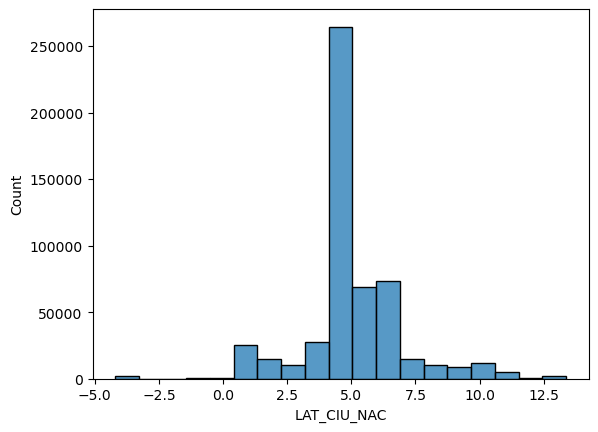

In [54]:
sns.histplot(data=latMAt,x="LAT_CIU_NAC",bins=math.ceil(np.ptp(latMAt["LAT_CIU_NAC"]))+1 )

In [53]:
latAsp = aspirantes[aspirantes['LAT_CIU_NAC']>-20]

<AxesSubplot:xlabel='LAT_CIU_NAC', ylabel='Count'>

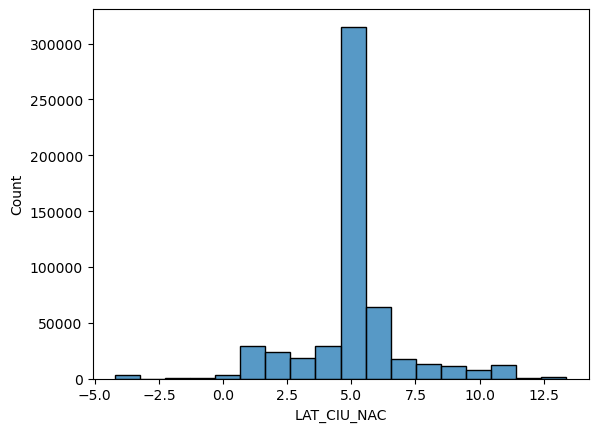

In [55]:
sns.histplot(data=latAsp,x="LAT_CIU_NAC",bins=math.ceil(np.ptp(latAsp["LAT_CIU_NAC"])) )

En los atributos categoricos `'AREAC_SNIES', 'AREA_CINE', 'CIU_NAC', 'CODS_NAC', 'DEP_NAC', 'ESTRATO', 'NACIONALIDAD', 'NIVEL', 'PAES', 'PEAMA', 'PROGRAMA', 'SEXO', 'TIPO_NIVEL'`

En este caso vale la pena hacer el analisis a `CIU_NAC`, `DEP_NAC`,`ESTRATO`,`NACIONALIDAD`,`NIVEL`,`PAES`,`PEAMA`,`PROGRAMA`,`SEXO`,`TIPO_NIVEL`

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

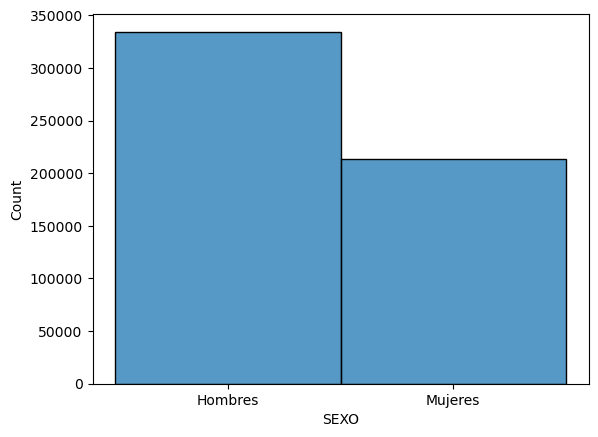

In [56]:
sns.histplot(data=matriculados,x="SEXO")

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

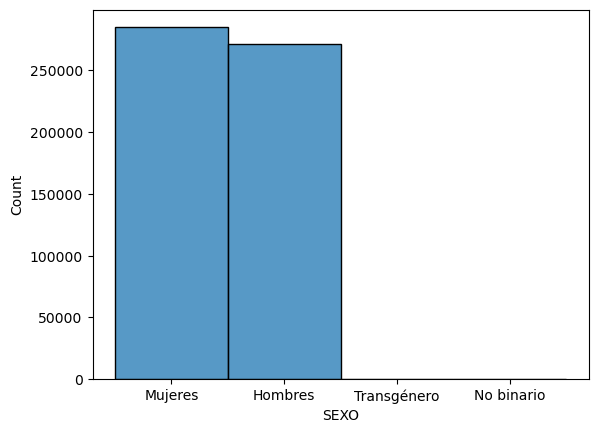

In [57]:
sns.histplot(data=aspirantes,x="SEXO")

In [69]:
aspirantes[(~aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])) & (aspirantes["TIPO_NIVEL"]=="Pregrado")]

,YEAR,SEMESTRE,TIPO_NIVEL,NIVEL,DEP_NAC,COD_DEP_NAC,CIU_NAC,COD_CIU_NAC,LON_CIU_NAC,LAT_CIU_NAC,...,PTOTAL,ADMITIDO,SNIES_PROGRA,PROGRAMA,AREAC_SNIES,CA_CINE,CD_CINE,AREA_CINE,MODALIDAD,RANGO_ANO_TERMINACION
401843,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,ENVIGADO,5266,-75.583191,6.166662,...,526.398,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
402655,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,572.769,Sí,16919,Artes Plásticas,Bellas artes,2,213,Artes y humanidades,No aplica,No aplica
402710,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,535.398,Sí,115,Historia,Ciencias sociales y humanas,2,222,Artes y humanidades,No aplica,No aplica
404340,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,498.433,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
404439,2023,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,442.487,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547778,2024,1,Pregrado,Pregrado,VAUPÉS,97,MITÚ,97001,-70.234960,1.251171,...,440.318,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
548141,2024,1,Pregrado,Pregrado,ANTIOQUIA,5,CHIGORODÓ,5172,-76.681565,7.666156,...,-89.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
549259,2024,1,Pregrado,Pregrado,ANTIOQUIA,5,MEDELLÍN,5001,-75.577056,6.248941,...,-89.000,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica
549806,2024,1,Pregrado,Pregrado,CALDAS,17,MANIZALES,17001,-75.490415,5.057051,...,405.604,No,-88,No aplica,No aplica,-88,-88,No aplica,No aplica,No aplica


In [70]:
asp_BinSex = aspirantes[aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])]

In [72]:
asp_BinSex.shape

(556669, 40)

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

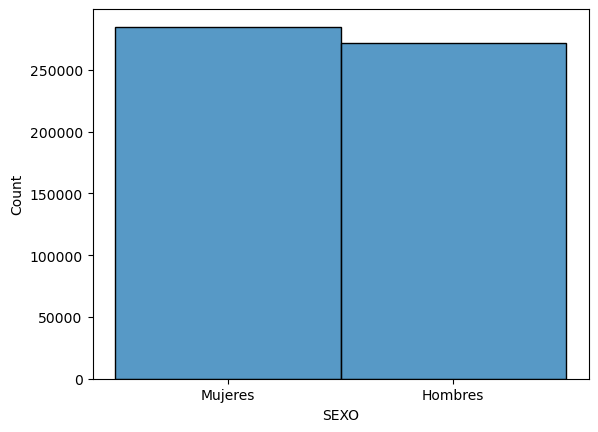

In [71]:
sns.histplot(data=asp_BinSex,x="SEXO")

# Clasificacion

# Inferencia

## SEXO (Binario)

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

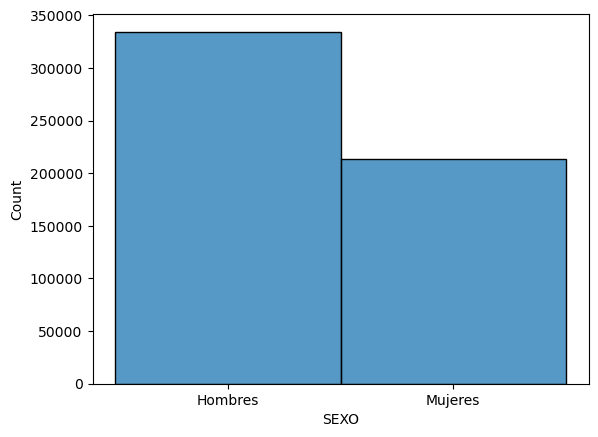

In [76]:
sns.histplot(data=matriculados,x="SEXO")

(array([2.61558e+05, 2.49515e+05, 8.00000e+01, 6.00000e+01]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

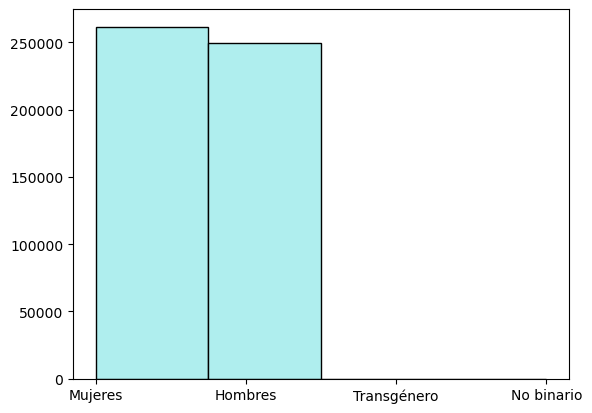

In [9]:
plt.hist(aspirantes["SEXO"],bins=4, color='paleturquoise', edgecolor='black')

In [11]:
asp_BinSex = aspirantes[aspirantes['SEXO'].isin(['Hombres', 'Mujeres'])]

<AxesSubplot:xlabel='SEXO', ylabel='Count'>

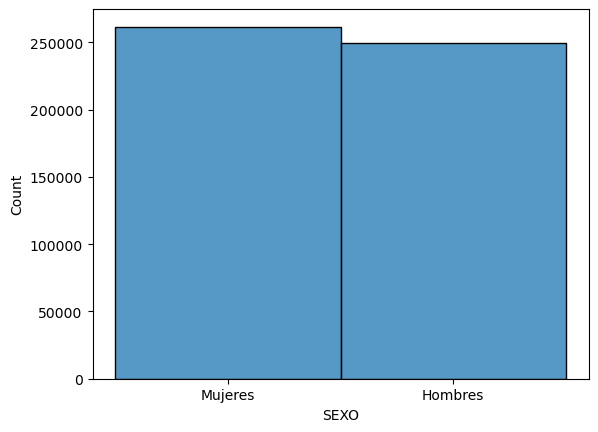

In [12]:
sns.histplot(data=asp_BinSex,x="SEXO")

In [17]:
nMat = matriculados.shape[0]
nAsp = asp_BinSex.shape[0]
print(f'la cantidad de estudiantes matriculados es de {nMat} y la de aspirantes es {nAsp}, es decir que en la base hay {nMat-nAsp} mas matriculados que aspirantes')

la cantidad de estudiantes matriculados es de 548189 y la de aspirantes es 511073, es decir que en la base hay 37116 mas aspirantes que matriculados


para esto tomaremos las poblaciones como bernoulli y el exito del experimento aleatorio sera ser mujer, de esta manera las proporciones son:

In [14]:
propMat = (matriculados[matriculados["SEXO"]=="Mujeres"].shape[0])/nMat
propAsp = (asp_BinSex[asp_BinSex["SEXO"]=="Mujeres"].shape[0])/nAsp

In [18]:
print(f'las estimaciones puntuales de las proporciones de mujeres respecto al total son de {propMat} para los matriculados y de {propAsp} para los aspirantes')

las estimaciones puntuales de las proporciones de mujeres respecto al total son de 0.38995310011693046 para los matriculados y de 0.5117820741850968 para los aspirantes


In [21]:
ep = propAsp - propMat
print(f'Y la estimacion puntual de la diferencia de las proporciones es de {propAsp - propMat}')

Y la estimacion puntual de la diferencia de las proporciones es de 0.12182897406816634


In [19]:
stats.norm.ppf(0.95)
ME = stats.norm.ppf(0.95)*(math.sqrt(propAsp*(1-propAsp)/nAsp + propMat*(1-propMat)/nMat))
ME

0.0015801307392179186

In [22]:
IC = ep + np.multiply([-1,1],[ME,ME])
IC

array([0.12024884, 0.1234091 ])

In [24]:
x = [0, 1]  # Valores posibles
yMat = stats.bernoulli.pmf(x, propMat)  # Probabilidad teórica P(X=0) y P(X=1)
yAsp = stats.bernoulli.pmf(x, propAsp)

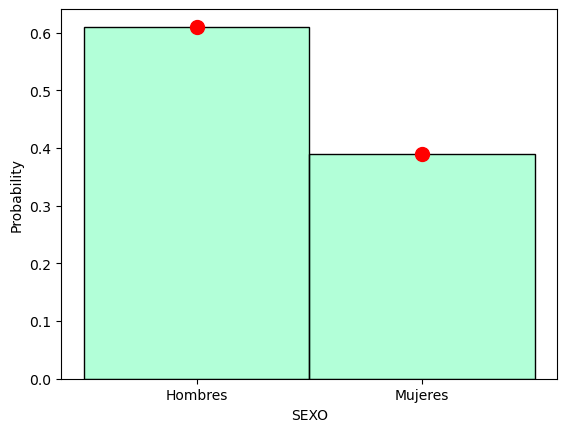

In [26]:
sns.histplot(matriculados["SEXO"], stat="probability",color='springgreen', edgecolor='black',alpha=0.3)
plt.scatter(["Hombres","Mujeres"],yMat, color='red', label='Distribución Bernoulli', zorder=3, s=100) #Estimacion

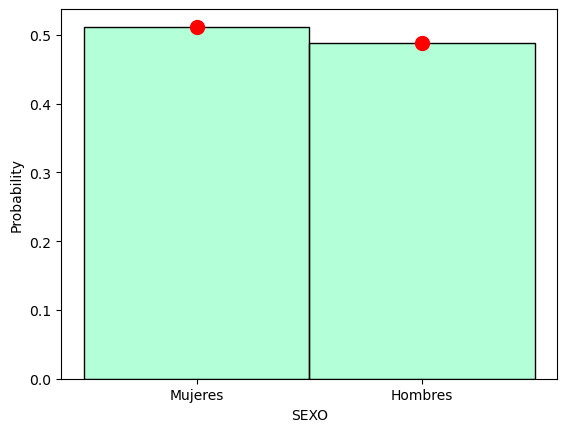

In [27]:
sns.histplot(asp_BinSex["SEXO"], stat="probability",color='springgreen', edgecolor='black',alpha=0.3)
plt.scatter(["Hombres","Mujeres"],yAsp, color='red', label='Distribución Bernoulli', zorder=3, s=100) #Estimacion

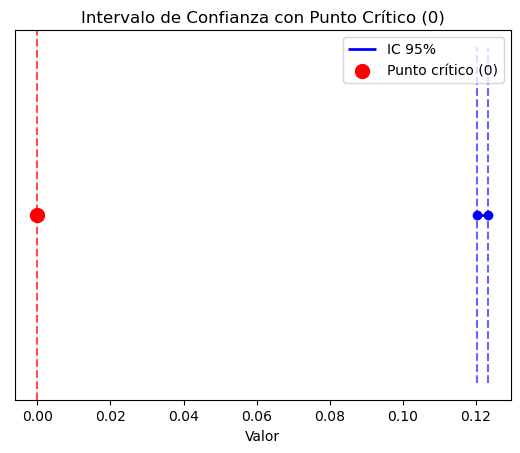

In [28]:
# Definir los límites del intervalo de confianza
ic_lower = IC[0]  # Límite inferior
ic_upper = IC[1]  # Límite superior

# Graficar la línea del intervalo de confianza
plt.hlines(y=1, xmin=ic_lower, xmax=ic_upper, color='blue', linewidth=2, label="IC 95%")

# Marcar los extremos del intervalo
plt.scatter([ic_lower, ic_upper], [1, 1], color='blue', zorder=3)

# Marcar el punto crítico (0) en rojo
plt.scatter(0, 1, color='red', label="Punto crítico (0)", zorder=4, s=100)

# Líneas verticales para conectar puntos
plt.vlines([ic_lower, ic_upper], ymin=0.9, ymax=1.1, color='blue', linestyle="dashed", alpha=0.6)

# Configuración del gráfico
plt.axvline(0, color="red", linestyle="--", alpha=0.7)  # Línea vertical en x=0
plt.xlabel("Valor")
plt.yticks([])  # Ocultar eje Y ya que no es necesario

plt.title("Intervalo de Confianza con Punto Crítico (0)")
plt.legend()
plt.show()

como se ve el punto critico de interes no pertenece al intervalo de confianza, es decir que no son la misma poblacion

## EDAD

<AxesSubplot:xlabel='EDAD', ylabel='Probability'>

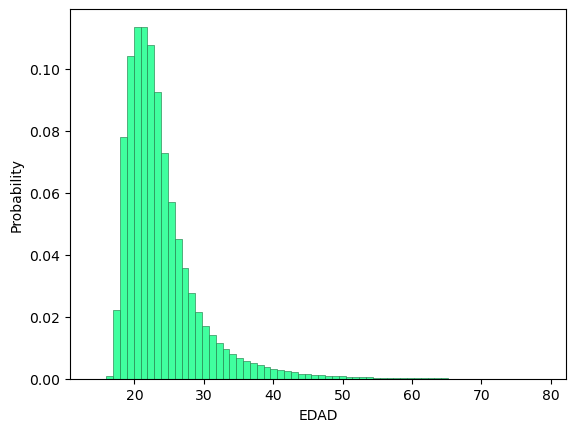

In [29]:
sns.histplot(matriculados["EDAD"], stat="probability",color='springgreen', edgecolor='seagreen',bins=np.ptp(matriculados['EDAD'])+1)

In [30]:
shapeMat, locMat, scaleMat = stats.gamma.fit(matriculados["EDAD"])

In [31]:
print(f"Shape (α): {shapeMat}")
print(f"Loc: {locMat}")  # Normalmente cerca de 0 si los datos siguen Gamma
print(f"Scale (β): {scaleMat}")

Shape (α): 3.136156248016728
Loc: 14.997256892876162
Scale (β): 2.7121290550513173


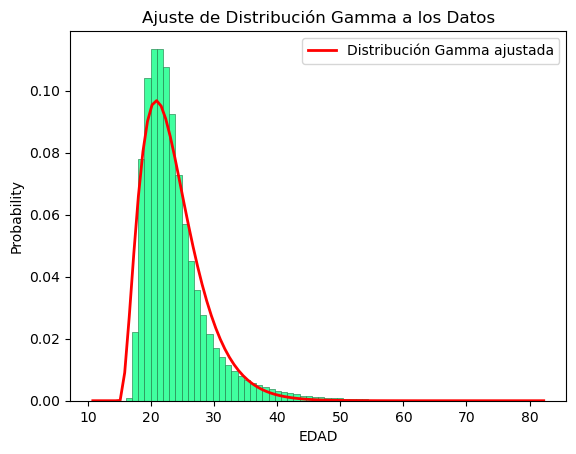

In [33]:
sns.histplot(matriculados["EDAD"], stat="probability",color='springgreen', edgecolor='seagreen',bins=np.ptp(matriculados['EDAD'])+1)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_ajustada = stats.gamma.pdf(x, shapeMat, locMat, scaleMat)

plt.plot(x, pdf_ajustada, 'r-', label="Distribución Gamma ajustada", linewidth=2)
plt.legend()
plt.title("Ajuste de Distribución Gamma a los Datos")
plt.show()

<AxesSubplot:xlabel='EDAD', ylabel='Probability'>

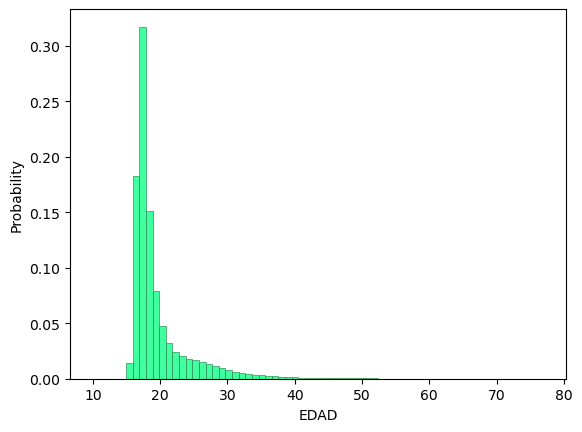

In [34]:
sns.histplot(aspirantes["EDAD"], stat="probability",color='springgreen', edgecolor='seagreen',bins=np.ptp(aspirantes['EDAD'])+1)

In [35]:
shapeAsp, locAsp, scaleAsp = stats.gamma.fit(aspirantes["EDAD"])

In [36]:
print(f"Shape (α): {shapeAsp}")
print(f"Loc: {locAsp}")  # Normalmente cerca de 0 si los datos siguen Gamma
print(f"Scale (β): {scaleAsp}")

Shape (α): 6.069203187218804
Loc: 9.997522371120361
Scale (β): 1.5234606469692817


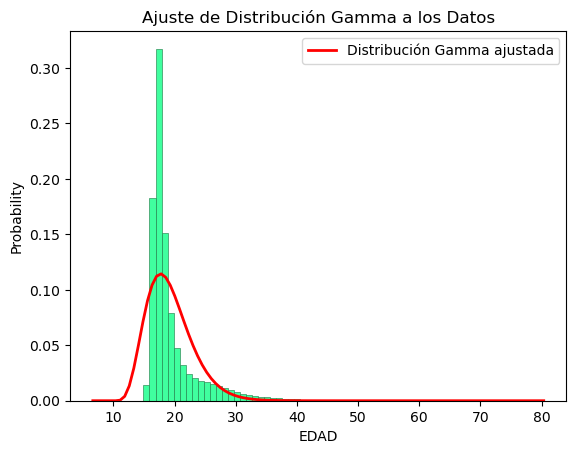

In [39]:
sns.histplot(aspirantes["EDAD"], stat="probability",color='springgreen', edgecolor='seagreen',bins=np.ptp(aspirantes['EDAD'])+1)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_ajustadaAsp = stats.gamma.pdf(x, shapeAsp, locAsp, scaleAsp)

plt.plot(x, pdf_ajustadaAsp, 'r-', label="Distribución Gamma ajustada", linewidth=2)
plt.legend()
plt.title("Ajuste de Distribución Gamma a los Datos")
plt.show()

## Estrato

### paso a numerico para facilitar el analisis 

<AxesSubplot:xlabel='ESTRATO', ylabel='Probability'>

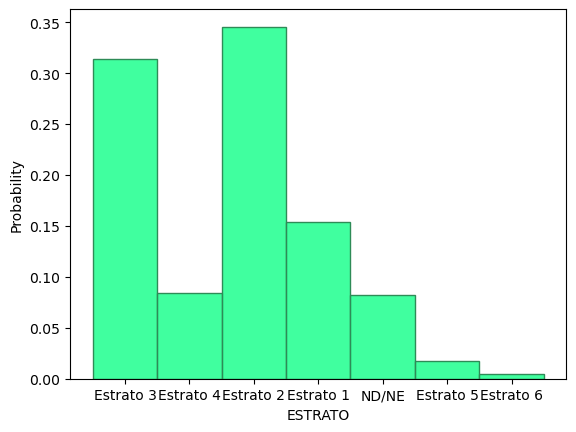

In [45]:
sns.histplot(data=matriculados,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen')

In [43]:
mapeo_estratos = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'ND/NE': 0  # Asignamos 0 a "ND"
}

In [116]:
matriculados["ESTRATO"] = matriculados["ESTRATO"].map(mapeo_estratos)

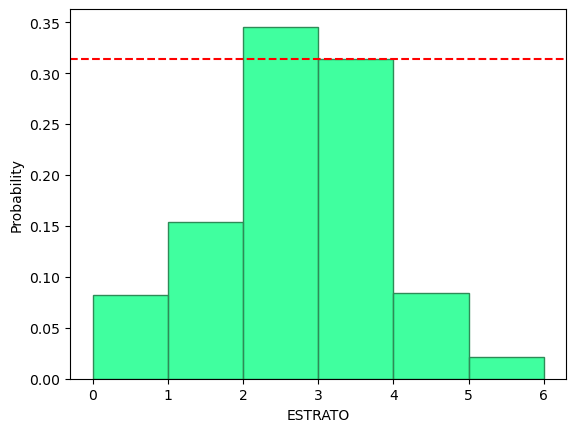

In [81]:
countEstratos = matriculados["ESTRATO"].value_counts().sort_index()
sns.histplot(data=matriculados,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)
plt.axhline(y=countEstratos[3]/matriculados.shape[0], color='red', linestyle='--', label=f'Estrato: {countEstratos[3]/matriculados.shape[0]}')

In [77]:
matriculados["ESTRATO"].value_counts().sort_index()

ESTRATO
0     45064
1     84134
2    189469
3    171846
4     45880
5      9385
6      2411
Name: count, dtype: int64

<AxesSubplot:xlabel='ESTRATO', ylabel='Probability'>

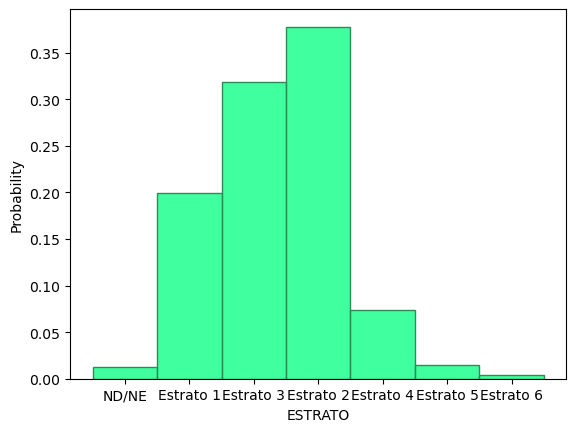

In [86]:
sns.histplot(data=aspirantes,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen')

In [103]:
aspirantes["ESTRATO"].describe()

count        511213
unique            7
top       Estrato 2
freq         193177
Name: ESTRATO, dtype: object

In [110]:
aspirantes["ESTRATO"]=aspirantes["ESTRATO"].map(mapeo_estratos)
aspirantes["ESTRATO"].head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    1
29    0
Name: ESTRATO, dtype: int64

<AxesSubplot:xlabel='ESTRATO', ylabel='Probability'>

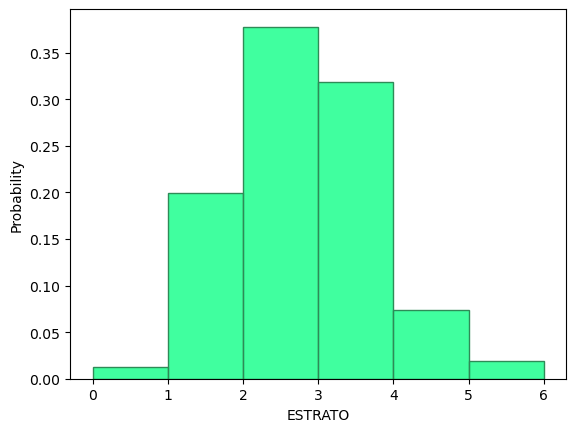

In [112]:
sns.histplot(data=aspirantes,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)

### Inferencia

<AxesSubplot:xlabel='ESTRATO', ylabel='Probability'>

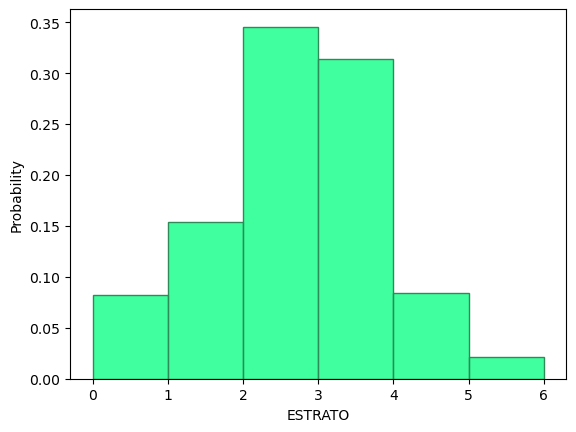

In [117]:
sns.histplot(data=matriculados,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)

In [124]:
meanMat,sdMat = stats.norm.fit(matriculados["ESTRATO"])


In [125]:
print(f"Media (μ): {meanMat}")
print(f"Standar Deviation (σ): {sdMat}")

Media (μ): 2.2319327823068322
Standar Deviation (σ): 1.1407054113056048


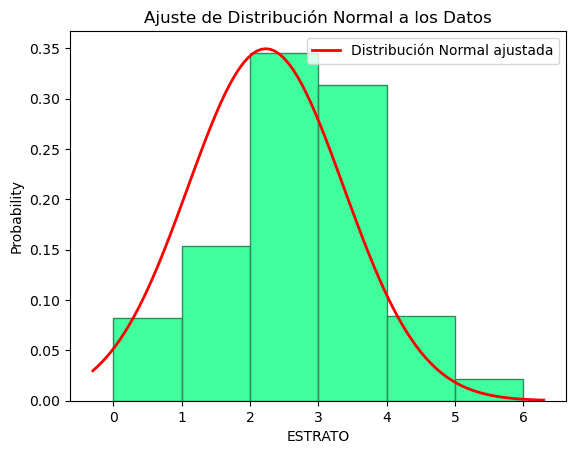

In [130]:
sns.histplot(matriculados["ESTRATO"], stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_ajustada = stats.norm.pdf(x,meanMat, sdMat)

plt.plot(x, pdf_ajustada, 'r-', label="Distribución Normal ajustada", linewidth=2)
plt.legend()
plt.title("Ajuste de Distribución Normal a los Datos")
plt.show()

ajuste a Poisson
SCipy, no tiene fit con poisson , sin embargo se sabe que el MLE de una poisson es la media

In [133]:
lambdaMat = matriculados["ESTRATO"].mean()

In [134]:
print(f"Lambda (λ): {lambdaMat}")

Lambda (λ): 2.2319327823068322


In [144]:
x = [0,1,2,3,4,5,6]  # Valores posibles
yMat = stats.bernoulli.pmf(6, lambdaMat)  # Probabilidad teórica P(X=0) y P(X=1)

In [146]:
yMat

nan

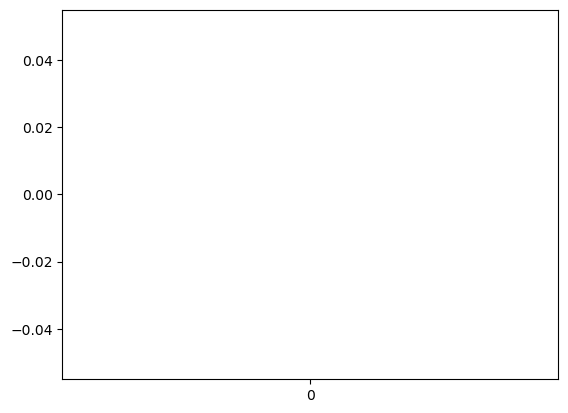

In [142]:
#sns.histplot(matriculados["ESTRATO"], stat="probability",color='springgreen', edgecolor='black',alpha=0.3,binwidth=1)
plt.scatter(["0","1","2","3","4","5","6"],yMat, color='red', label='Distribución Poisson') #Estimacion

<AxesSubplot:xlabel='ESTRATO', ylabel='Probability'>

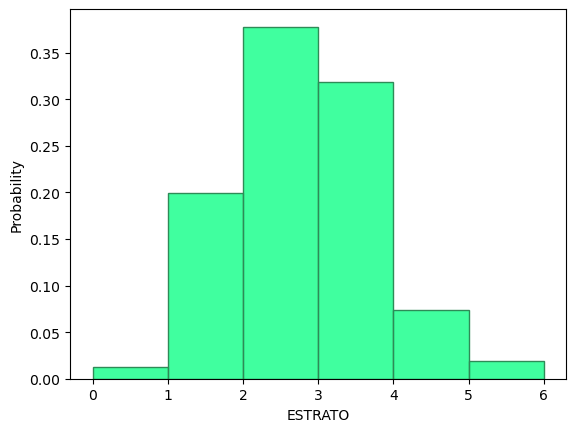

In [114]:
sns.histplot(data=aspirantes,x="ESTRATO", stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)

In [126]:
meanAsp,sdAsp = stats.norm.fit(aspirantes["ESTRATO"])

In [127]:
print(f"Media (μ): {meanAsp}")
print(f"Standar Deviation (σ): {sdAsp}")

Media (μ): 2.3043173784704223
Standar Deviation (σ): 0.9851890496301977


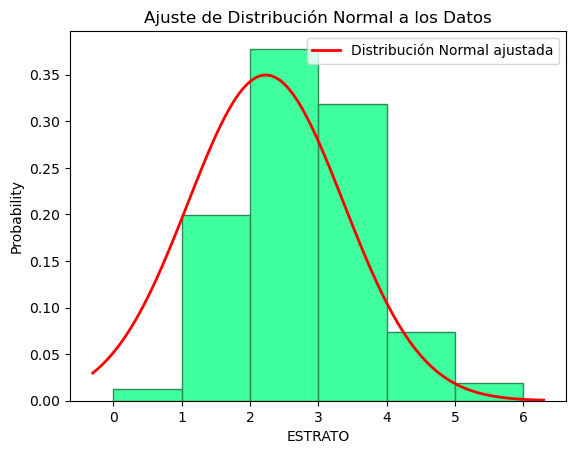

In [131]:
sns.histplot(aspirantes["ESTRATO"], stat="probability",color='springgreen', edgecolor='seagreen',binwidth=1)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf_ajustada = stats.norm.pdf(x,meanMat, sdMat)

plt.plot(x, pdf_ajustada, 'r-', label="Distribución Normal ajustada", linewidth=2)
plt.legend()
plt.title("Ajuste de Distribución Normal a los Datos")
plt.show()

Metodo preferido Bootstrap o intervalos de confianza.
Si se sabe la distribucion se prioriza el uso de intervalos de confianza
